## Download one stock and save to CSV

In [1]:
from data import DataManager, DownloadRequest

# Initialize the data manager
manager = DataManager()

# Define what to download
request = DownloadRequest(
    ticker="AAPL",
    start_date="2023-01-01",
    end_date="2023-12-31",
    save=True
)

# Download data
df = manager.download_stock_data(request)

print(df.head())
df.columns

2025-11-08 13:12:21 - data.data_manager - INFO - Downloading AAPL from 2023-01-01 to 2023-12-31
2025-11-08 13:12:22 - data.data_manager - INFO - Saved AAPL data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\AAPL.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Downloaded 250 rows for AAPL
                  Open        High         Low       Close     Volume
Date                                                                 
2023-01-03  128.468186  129.079559  122.443158  123.330643  112117500
2023-01-04  125.125350  126.870739  123.340524  124.602722   89113600
2023-01-05  125.361998  125.993097  123.024963  123.281342   80962700
2023-01-06  124.257579  128.478048  123.153152  127.817368   87754700
2023-01-09  128.655553  131.554669  128.083618  128.339996   70790800


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## Download multiple tickers at once

In [2]:
from data import DataManager, DownloadRequest

manager = DataManager()

requests = [
    DownloadRequest(ticker="GOOG", start_date="2023-01-01"),
    DownloadRequest(ticker="MSFT", start_date="2023-01-01"),
    DownloadRequest(ticker="TSLA", start_date="2023-01-01"),
]

data_dict = manager.download_multiple_stocks(requests)

for ticker, df in data_dict.items():
    print(f"{ticker}: {len(df)} rows")
    print(df.head())


2025-11-08 13:12:22 - data.data_manager - INFO - Downloading GOOG from 2023-01-01 to 2025-11-08
2025-11-08 13:12:22 - data.data_manager - INFO - Saved GOOG data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\GOOG.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Downloaded 716 rows for GOOG
2025-11-08 13:12:22 - data.data_manager - INFO - Downloading MSFT from 2023-01-01 to 2025-11-08
2025-11-08 13:12:22 - data.data_manager - INFO - Saved MSFT data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\MSFT.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Downloaded 716 rows for MSFT
2025-11-08 13:12:22 - data.data_manager - INFO - Downloading TSLA from 2023-01-01 to 2025-11-08
2025-11-08 13:12:22 - data.data_manager - INFO - Saved TSLA data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\TSLA.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Downloaded 716 rows for TSLA
GOOG: 716 rows
                 Open       High  

## Load saved data

In [3]:
from data import DataManager

manager = DataManager()

df = manager.load_data("AAPL")

if not df.empty:
    print(df.tail())
else:
    print("No data found locally for AAPL.")


2025-11-08 13:12:22 - data.data_manager - INFO - Loaded 250 rows for AAPL from C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\AAPL.csv
                  Open        High         Low       Close    Volume
Date                                                                
2023-12-22  193.541408  193.769488  191.349970  191.974686  37149600
2023-12-26  191.984587  192.262235  191.211137  191.429291  28919300
2023-12-27  190.874010  191.875525  189.485754  191.528458  48087700
2023-12-28  192.510130  193.025769  191.548272  191.954834  34049900
2023-12-29  192.272159  192.767962  190.120379  190.913666  42672100


## Getting close prices for several stock data

In [4]:
from data import DataManager

manager = DataManager()

tickers = ["AAPL", "MSFT", "GOOG"]
prices = manager.get_close_prices(tickers, start_date="2023-01-01")

print(prices.tail())


2025-11-08 13:12:22 - data.data_manager - INFO - Loaded 250 rows for AAPL from C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\AAPL.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Loaded 716 rows for MSFT from C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\MSFT.csv
2025-11-08 13:12:22 - data.data_manager - INFO - Loaded 716 rows for GOOG from C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\GOOG.csv
                  AAPL        MSFT        GOOG
Date                                          
2025-11-03  190.913666  517.030029  284.119995
2025-11-04  190.913666  514.330017  278.059998
2025-11-05  190.913666  507.160004  284.750000
2025-11-06  190.913666  497.100006  285.339996
2025-11-07  190.913666  496.820007  279.700012


C:\Users\shubh\PycharmProjects\systematic_trading\data\data_manager.py:150: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df = price_df.fillna(method='ffill')


## Fetch stock metadata (info)

In [5]:
from data import DataManager

manager = DataManager()

info = manager.get_stock_info("TSLA")

if info:
    print(f"Name: {info.name}")
    print(f"Sector: {info.sector}")
    print(f"Currency: {info.currency}")
    print(f"Exchange: {info.exchange}")
else:
    print("Failed to retrieve stock info.")


Name: Tesla, Inc.
Sector: Consumer Cyclical
Currency: USD
Exchange: NMS


##

## Combined workflow — from download to close-price matrix

2025-11-08 13:12:24 - data.data_manager - INFO - Downloading AAPL from 2023-01-01 to 2025-11-08
2025-11-08 13:12:24 - data.data_manager - INFO - Saved AAPL data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\AAPL.csv
2025-11-08 13:12:24 - data.data_manager - INFO - Downloaded 716 rows for AAPL
2025-11-08 13:12:24 - data.data_manager - INFO - Downloading GOOG from 2023-01-01 to 2025-11-08
2025-11-08 13:12:24 - data.data_manager - INFO - Saved GOOG data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\GOOG.csv
2025-11-08 13:12:24 - data.data_manager - INFO - Downloaded 716 rows for GOOG
2025-11-08 13:12:24 - data.data_manager - INFO - Downloading AMZN from 2023-01-01 to 2025-11-08
2025-11-08 13:12:24 - data.data_manager - INFO - Saved AMZN data to C:\Users\shubh\PycharmProjects\systematic_trading\data\historical\AMZN.csv
2025-11-08 13:12:24 - data.data_manager - INFO - Downloaded 716 rows for AMZN
2025-11-08 13:12:24 - data.data_manager - INFO - 

C:\Users\shubh\PycharmProjects\systematic_trading\data\data_manager.py:150: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df = price_df.fillna(method='ffill')


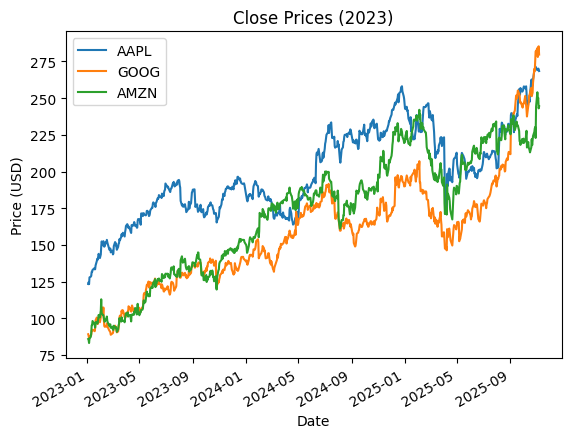

In [6]:
from data import DataManager, DownloadRequest
import matplotlib.pyplot as plt

manager = DataManager()

# Step 1: Download multiple tickers
tickers = ["AAPL", "GOOG", "AMZN"]
requests = [DownloadRequest(ticker=t, start_date="2023-01-01") for t in tickers]
manager.download_multiple_stocks(requests)

# Step 2: Get close prices
prices = manager.get_close_prices(tickers)

# Step 3: Visualize
prices.plot(title="Close Prices (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()
